# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [33]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head(5) 

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


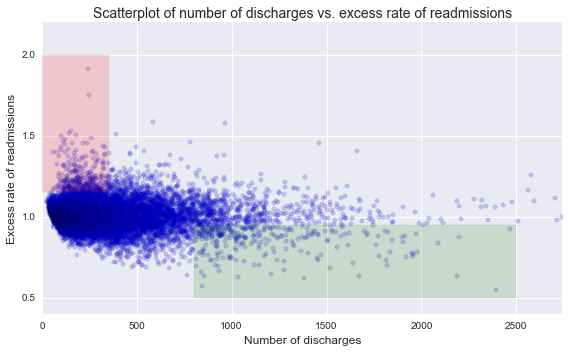

In [34]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [35]:
# Your turn

In [36]:
# select only columns that are I'm interested
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio', \
                             'Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']]
# remove data with 4 columns with NaN (null)
df = df.dropna(how='any')
 
 




Mean Excess Readmission (high discharges):  0.978334267241
Mean Excess Readmission (low  discharges):  1.01426055121
Number of hospitals with high number of discharges and high excess readmission ratio =  44.3965517241
Number of hospitals with low number of discharges and high excess readmission ratio =  53.7834311807
Compare number of dscharges p-value= Ttest_indResult(statistic=-6.3430839424391099, pvalue=5.0720238332145599e-10)


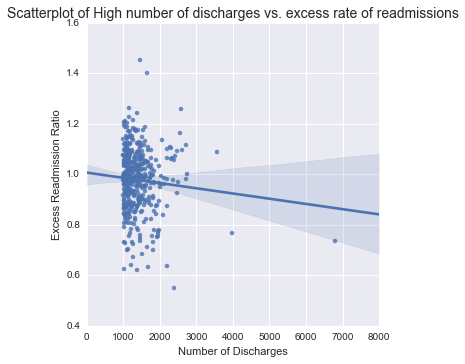

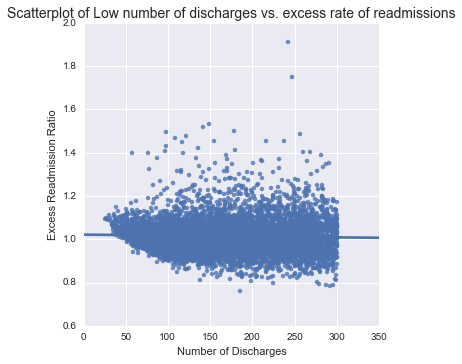

In [37]:
from scipy import stats

# define 1000 as high number of discharges and less than 300 as low
df_hi_dsch = df[df['Number of Discharges'] >= 1000]
df_lo_dsch = df[df['Number of Discharges'] <= 300]

# compute the mean for checking
print('Mean Excess Readmission (high discharges): ',df_hi_dsch['Excess Readmission Ratio'].mean())
print('Mean Excess Readmission (low  discharges): ',df_lo_dsch['Excess Readmission Ratio'].mean())
print('Number of hospitals with high number of discharges and high excess readmission ratio = ', \
      (df_hi_dsch[df_hi_dsch['Excess Readmission Ratio'] > 1.0].count()[0])/df_hi_dsch.count()[0]*100)
print('Number of hospitals with low number of discharges and high excess readmission ratio = ', \
      (df_lo_dsch[df_lo_dsch['Excess Readmission Ratio'] > 1.0].count()[0])/df_lo_dsch.count()[0]*100)

# compute the t-test pvalue
print('Compare number of dscharges p-value=', \
      stats.ttest_ind(df_hi_dsch['Excess Readmission Ratio'], df_lo_dsch['Excess Readmission Ratio'], equal_var = False))
 
# construct scatterplot    
sns.lmplot('Number of Discharges','Excess Readmission Ratio', df_hi_dsch) 
sns.plt.title('Scatterplot of High number of discharges vs. excess rate of readmissions', fontsize=14)
sns.lmplot('Number of Discharges','Excess Readmission Ratio', df_lo_dsch) 
sns.plt.title('Scatterplot of Low number of discharges vs. excess rate of readmissions', fontsize=14)
 

                            Number of Discharges  Excess Readmission Ratio  \
Number of Discharges                    1.000000                 -0.097398   
Excess Readmission Ratio               -0.097398                  1.000000   
Predicted Readmission Rate             -0.135163                  0.200039   
Expected Readmission Rate              -0.131091                 -0.031104   
Number of Readmissions                  0.791272                  0.117600   

                            Predicted Readmission Rate  \
Number of Discharges                         -0.135163   
Excess Readmission Ratio                      0.200039   
Predicted Readmission Rate                    1.000000   
Expected Readmission Rate                     0.965420   
Number of Readmissions                        0.361033   

                            Expected Readmission Rate  Number of Readmissions  
Number of Discharges                        -0.131091                0.791272  
Excess Readmission Rat

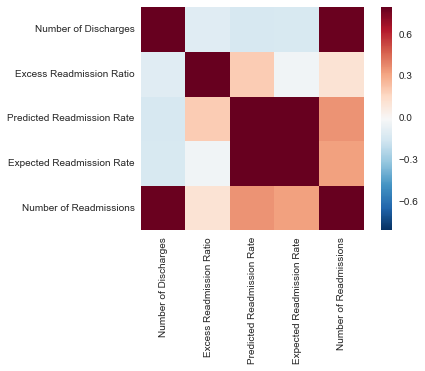

In [38]:
# construct correlation matrix
corrmat = df.corr()
print(corrmat) 
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)


In [39]:
import numpy as np
import scipy as sc

def cohens_d(x, y):
    lx = len(x)- 1
    ly = len(y)- 1
    md  = np.abs(x.mean() - y.mean())        ## mean difference (numerator)
    csd = lx * x.var() + ly * y.var()
    csd = csd/(lx + ly)
    #print(md)
    csd = np.sqrt(csd)                    ## common sd computation

    return md/csd                        ## cohen's d

def printCohen(x):
    if x >= .80:
        print("large effect")
    elif x >= .50:
        print("medium effect")
    elif x >= .20:
        print("small effect")
    else: print("no effect")    
    return x

cd=cohens_d(df_hi_dsch, df_lo_dsch)
print(df_hi_dsch.dtypes.index[1], 'cohen''s d ratio= ',printCohen(cd[1]))
print('test Pearson r: ', sc.stats.pearsonr(df['Number of Discharges'],df['Excess Readmission Ratio']))

small effect
Excess Readmission Ratio cohens d ratio=  0.419738200509
test Pearson r:  (-0.097397943510793533, 1.222547377680967e-25)


****
<div class="span5 alert alert-info">
### ANSWERS:

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
<lu> Overall, rate of readmissions is trending down with increasing number of discharges
<b> -> Disagree, there is a small effect (.42) of rate of readmissions and number of discharges.</b>
<lu> With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
<lu> With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
<b> -> Disagree, although there is a high significant difference on excess rate of readmissions between high discharges and low discharges (p = 0.00**) , the effect size has a small effect (cohen's d = 0.42).  It means that the incidence of excess rate of readmissions have small effect with either high or low number of discharges.</b>

**B. Statistics**
+ In hospitals/facilities with number of discharges $<$ 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1  <b>I agree with this findings </b>
+ In hospitals/facilities with number of discharges $>$ 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1  <b>I agree with this findings </b>

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. <b> Yes, the correlation is significant at $alpha$=.01 which means that the pearson r is not equal to zero. However, there is a weak negative correlation between number of discharges and excess readmission rates (pearson r = -0.1)</b>
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
<b>There is a small difference between smaller and bigger hospitals in terms of number of discharges.  The effect size is 0.42 so the difference on the incidence of execess rate of readmissions is small. </b>
**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity ($<$ 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. 
<b>Regardless of capacity, hospitals should be required to demonstrate upgraded resource allocation for quality care.  </b>
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
<b>Incentive shoud be provided for hospitals with lower excess rate of readmissions</b>

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test. <b> Test the null hypothesis that the excess rate of readmission between high and low number of discharges are the same. Alternative hypothesis is that the excess rate of readmission between high and low number of discharges are not the same</b>
   2. Compute and report the observed significance value (or p-value). <b>the computed p-value is zero (0.00**) </b>
   3. Report statistical significance for $\alpha$ = .01.  <b> t-test is highly significant for $\alpha$ = .01 because the p-value is less than $\alpha$ </b>
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? <b>Although, the statistic is highly significance for $\alpha$ = .01, the effect size is small (cohen's d = 0.31).  It means that the high and low number of discharges have a small difference on excess rate of readmission. </b>
   5. Look at the scatterplot above. 
      <lu> - What are the advantages and disadvantages of using this plot to convey information?
      <b> The advantage is that it gives visualization if the relationship between number of discharges compared to excess rate of readmission is linear or not. With the shaded regions (high and low rate of readmission), it also gives an idea of how many data are under low discharge and high readmission rate and high discharge and low readmission rate.  However, the disadvantage is that data is overlapping to each other, it is not showing the complete picture of all data </b>
      <lu> - Construct another plot that conveys the same information in a more direct manner.
      <b> please see two scatterplot for both high and low number of discharges</b>
      
      